In [2]:
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import matplotlib.pyplot as plt

import scikitplot as skplt

In [3]:
df= pd.read_csv('./data/moral_appeal_dataset.csv')
df

,ad,moral_appeal
0,psd jobs spring launch webinar monday pmpm vir...,0
1,the aflcio has always fought alongside workers...,1
2,your national monuments are on the chopping block,0
3,join us for a focus group to share your though...,0
4,with president trump nominating a judge with a...,1
...,...,...
19729,what is senator heidi heitkamp hiding watch be...,0
19730,breaking the washington post just reported on ...,0
19731,protecting vermont is injured employees contac...,1
19732,according to the huffington post days after pa...,0


In [4]:
# vectorize testing and training data 
X_train, X_test, y_train, y_test= train_test_split(df['ad'], df['moral_appeal'] , test_size = 0.2, random_state = 0)

In [5]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [6]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)

MultinomialNB()

accuracy:   0.837
                 precision    recall  f1-score   support

no moral appeal       0.99      0.68      0.80      1930
   moral appeal       0.76      0.99      0.86      2017

       accuracy                           0.84      3947
      macro avg       0.87      0.83      0.83      3947
   weighted avg       0.87      0.84      0.83      3947

confusion matrix:
[[1303  627]
 [  16 2001]]



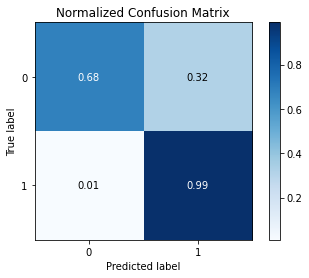

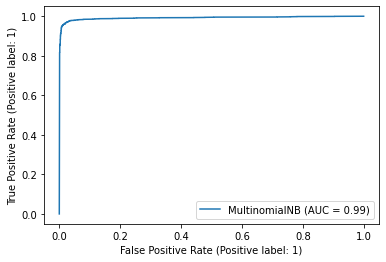

In [ ]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['no moral appeal', 'moral appeal']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [ ]:
df_val = pd.read_csv('sample_moral_appeal.csv').drop(columns = 'Unnamed: 0')
df_val

,ad,moral_appeal
0,yearold danylo is not only battling cancer but...,1
1,learn how to use the new staffing law to impro...,0
2,we are live with climate activist anuna de wev...,0
3,did you miss the t summit relive the daylong e...,0
4,friday is north carolina’s online voter regist...,0
...,...,...
120,in just three months time they likely will be ...,0
121,we have until march st to raise money for our ...,0
122,ukraine needs your support\nany donation you p...,1
123,djibouti faces extreme water scarcity exacerba...,0


accuracy:   0.624
                 precision    recall  f1-score   support

no moral appeal       1.00      0.08      0.15        51
   moral appeal       0.61      1.00      0.76        74

       accuracy                           0.62       125
      macro avg       0.81      0.54      0.45       125
   weighted avg       0.77      0.62      0.51       125

confusion matrix:
[[ 4 47]
 [ 0 74]]



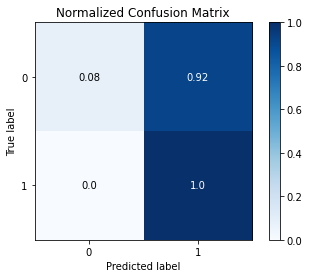

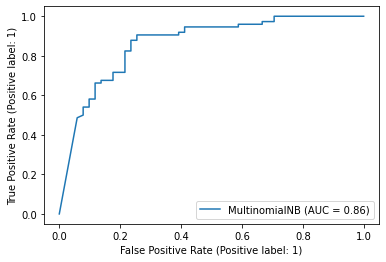

In [ ]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['moral_appeal']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no moral appeal', 'moral appeal']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)

df_val['predictions'] = y_pred